In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./data/genetherapy.csv")

<AxesSubplot:xlabel='Therapy', ylabel='expr'>

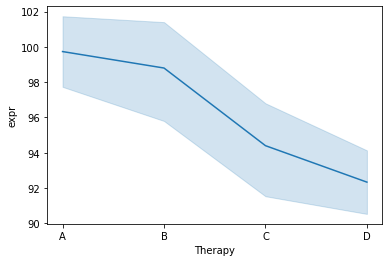

In [3]:
# Доверительные интервалы
sns.lineplot(x='Therapy', y='expr', data=data)

<ErrorbarContainer object of 3 artists>

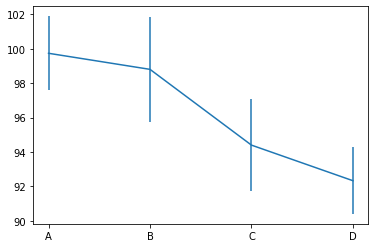

In [4]:
# Доверительные интервалы
groups = data.groupby('Therapy')['expr']
n = groups.apply(len)
mean = groups.mean()
std = groups.std() / np.sqrt(n)

plt.errorbar(x = mean.index, y = mean, yerr = 2*std)

In [5]:
from scipy.stats import stats
import pandas as pd
import numpy as np


def ssw(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    return np.sum([
        (
            main_data.loc[main_data[group_col] == group, value_col] -
            main_data.loc[main_data[group_col] == group, value_col].mean()
        ) ** 2
        for group in group_names
    ])


def ssb(main_data: pd.DataFrame, group_col: str, value_col: str):
    group_names = data[group_col].unique()
    overall_mean = main_data[value_col].mean()
    return np.sum([
        len(main_data.loc[main_data[group_col] == group, value_col]) * (
            main_data.loc[main_data[group_col] == group, value_col].mean() -
            overall_mean
        ) ** 2
        for group in group_names
    ])


# Файл данных должен лежать в папке с файлом .py (или .ipynb) 
data = pd.read_csv('./data/genetherapy.csv')
groups = data['Therapy'].unique()
subsets = [data.query('Therapy == @group')['expr'] for group in groups]

ssb_df = len(groups) - 1
ssw_df = data.shape[0] - len(groups)

SSW = ssw(data, 'Therapy', 'expr')
SSB = ssb(data, 'Therapy', 'expr')

f_val, p_val = stats.f_oneway(*subsets)

anova_results = pd.DataFrame([
{
        'Df': ssb_df,
        'Sum Sq': '{0:.2f}'.format(SSB),
        'Mean Sq': '{0:.2f}'.format(SSB / ssb_df),
        'F-value': '{0:.2f}'.format(f_val),
        'p-value': '{0:.4f}'.format(p_val),
    },
    {
        'Df': ssw_df,
        'Sum Sq': '{0:.2f}'.format(SSW),
        'Mean Sq': '{0:.2f}'.format(SSW / ssw_df),
        'F-value': '',
        'p-value': '',
    },
], index=['Therapy', 'Residuals'])

print(anova_results)

           Df   Sum Sq Mean Sq F-value p-value
Therapy     3   560.72  186.91    8.04  0.0002
Residuals  56  1302.27   23.25                


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('expr ~ Therapy', data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df       sum_sq     mean_sq         F    PR(>F)
Therapy    3.0   560.716667  186.905556  8.037302  0.000152
Residual  56.0  1302.266667   23.254762       NaN       NaN


In [7]:
from scipy import stats
import pandas as pd

data = pd.read_csv('./data/genetherapy.csv')
samples=[list(frame) for group, frame in data.groupby('Therapy')['expr']]
stats.f_oneway(*samples)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [8]:
from scipy import stats
import pandas as pd

# Выборки которые надо сравнить
data = pd.read_csv('./data/genetherapy.csv')

gr = data.groupby('Therapy')['expr']
data = pd.DataFrame(gr.groups)

print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)
Результат:
отклоняем нулевую гипотезу
